In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy.ndimage as snd

C:\Users\edend\AppData\Local\Temp\ipykernel_10096\3593475226.py:1: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig = plt.figure(1, [8,8])


Please enter name of function to use:  trig


<Figure size 800x800 with 0 Axes>

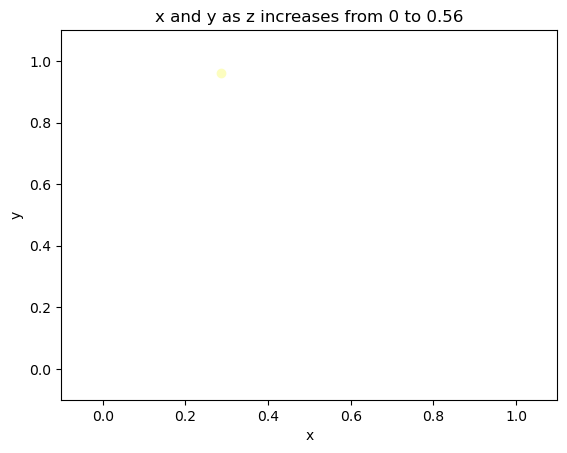

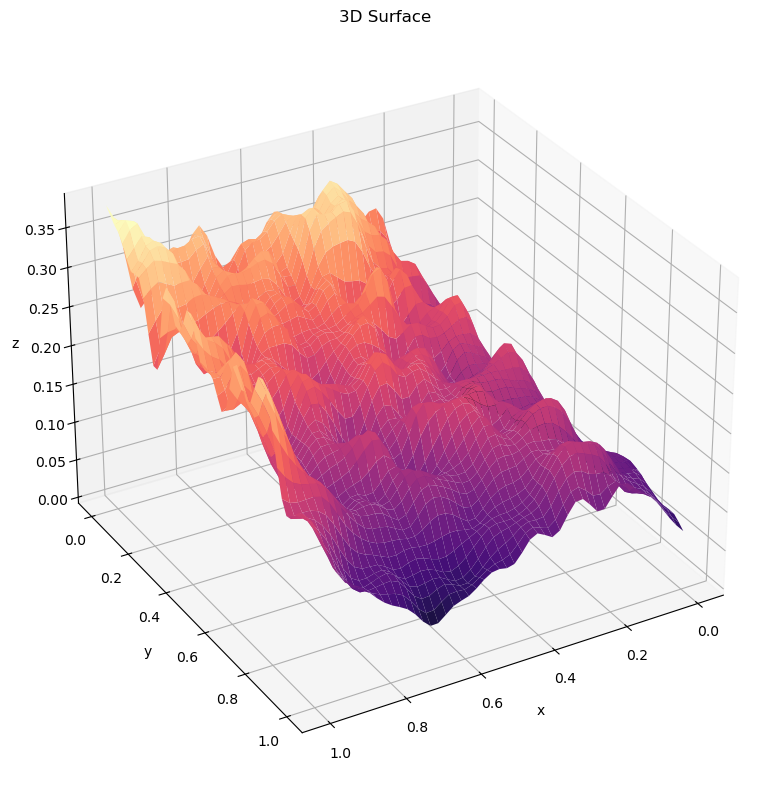

In [23]:
fig = plt.figure(1, [8,8])
ax = plt.axes(projection = '3d')
ax.view_init(elev = 30, azim = 60, roll = 0)

def surf(name): #create a surface using some function
    x = np.linspace(0, 1)
    y = np.linspace(0, 1)
    X, Y = np.meshgrid(x, y)
    
    if name == 'trig':
        z = np.sin(X) * np.cos(Y) + (0.2 * np.sin(5 * X + Y))
    elif name == 'trig and poly':
        z = np.sin(X) * np.cos(Y) + (0.2 * X * Y) + (0.1 * X ** 2) - (0.3 * Y ** 2)
    elif name == 'poly and exp':
        z = np.exp(X ** 2 + Y) + (X ** 3) - (2 * Y ** 5)
    else:
        print(f'Name not recognized. Please type \n"trig", "trig and poly", or "poly and exp"')
    
    r, c = np.shape(X)
    randfilt = np.random.rand(r, c)
    smooth = snd.gaussian_filter(randfilt, 1.5)
    Z = z * smooth
    
    return X, Y, Z
    

x, y, z = surf(str(input('Please enter name of function to use: '))) 

surface = ax.plot_surface(x, y, z, cmap = 'magma')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D Surface')
plt.tight_layout()
plt.show()

In [8]:
import matplotlib.animation as animate
from IPython.display import HTML
import pandas as pd

In [24]:
plt.figure(2, [8, 8])
zround = np.round(z, decimals = 2)
zsort = np.unique(np.round(np.sort(z, axis = None), decimals = 2))

cmap = mp.colormaps['magma']
numcolor = zsort.shape[0]
colors = cmap(np.linspace(0, 1, numcolor))

for n in range(zsort.shape[0]):
    
    zval = zsort[n]
    index = np.argwhere(zround == zval)
    xcoord = []
    ycoord = []
  
    for i, j in index:  
        
        xcoord.append(x[i, j])
        ycoord.append(y[i, j])


        #plt.clf()
        #plt.scatter(xcoord, ycoord, color = colors[n])
        #plt.xlim(-0.1, 1.1)
        #plt.ylim(-0.1, 1.1)
        #plt.title(f'x and y at z = {zval}')
        #plt.xlabel('x')
        #plt.ylabel('y')
        
    #plt.savefig('images/imshow -' + str(n).zfill(2) + '.png')  

In [25]:
xd = x.flatten()
yd = y.flatten()
zd = zround.flatten()
data = pd.DataFrame({'x': xd, 'y': yd, 'z': zd})
data = data.sort_values('z')

batches = data.groupby('z').apply(lambda g: g.index.tolist()).tolist()
print(len(batches))

fig, ax  = plt.subplots()
elev = plt.scatter([], [])
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title(f'x and y as z increases from 0 to {zval}')
plt.xlabel('x')
plt.ylabel('y')

cmap = mp.colormaps['magma']
numcolor = len(batches)
colors = cmap(np.linspace(0, 1, numcolor))

def anime(frame):
    batch = batches[frame]
    xs = data.iloc[batch]['x'].to_numpy()
    ys = data.iloc[batch]['y'].to_numpy()
    coords = np.column_stack((xs, ys))
    elev.set_offsets(coords)
    elev.set_color(colors[frame])
    return elev,

frametime = len(batches)
anim = animate.FuncAnimation(fig, anime, frames = frametime, interval = 750, blit = True)

HTML(anim.to_jshtml())

C:\Users\edend\AppData\Local\Temp\ipykernel_10096\2054845511.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  batches = data.groupby('z').apply(lambda g: g.index.tolist()).tolist()


39
